In [2]:
import numpy as np
from ctypes import CDLL

from c_Grid import Grid, Grid_Interface
from c_Return_Data import Return_Data_Interface
from c_Computation_Data import Computation_Data, Computation_Data_Interface
from c_Computation import Computation_Interface
from c_Gross_Neveu import Gross_Neveu_Interface

# import importlib
# importlib.reload(c_Return_Data)

In [6]:

lib = CDLL("./build/src/libgross_neveu.dylib")

sigma_max = 6
N_Grid = 1000
samples = 10
Lambda = 1e5
kir = 1e-4
tolerances = 1e-10
h = 1
sigma_0 = 1.0
d = 1
d_gamma = 2
mu = 0.1
T = 0.1
N_Flavor = np.infty
# N_Flavor = 2

grid_points = np.linspace(0, sigma_max, N_Grid)

grid = Grid_Interface(lib, grid_points)

return_data = Return_Data_Interface(lib, samples, grid.pointer)

physics_data = Gross_Neveu_Interface(
    lib, Lambda, h, sigma_0, d, d_gamma, mu, T, N_Flavor)

computation_data = Computation_Data_Interface(
    lib, Lambda, kir, grid.pointer, physics_data.pointer, tolerances)

Computation_Interface(lib, computation_data.pointer, return_data.pointer)

# print(return_data.grid)
# print(return_data.solution)

Computation done in 0.1 seconds                           


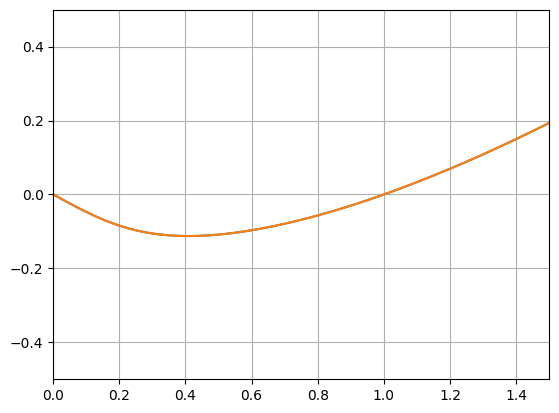

In [7]:
import json
import matplotlib.pyplot as plt
with open('1+1_test_files/flow_MF_T=0.1,mu=0.1.json') as user_file:
    parsed_json = json.load(user_file)
    x = parsed_json["graphs"][-1]["x"]
    y = parsed_json["graphs"][-1]["y"]
# print(parsed_json["graphs"][-1].keys())
plt.plot(return_data.grid, return_data.solution[-1])
plt.plot(x, y)
plt.grid()
plt.xlim([0.0, 1.5])
plt.ylim([-0.5, 0.5])
plt.show()

In [9]:

lib = CDLL("./build/src/libgross_neveu.dylib")

sigma_max = 6
N_Grid = 1000
samples = 10
Lambda = 1e5
kir = 1e-4
tolerances = 1e-11
h = 1
sigma_0 = 1.0
d = 1
d_gamma = 2
mu = 0.1
T = 0.1
N_Flavor = 2

grid_points = np.linspace(0, sigma_max, N_Grid)

grid = Grid_Interface(lib, grid_points)

return_data = Return_Data_Interface(lib, samples, grid.pointer)

physics_data = Gross_Neveu_Interface(
    lib, Lambda, h, sigma_0, d, d_gamma, mu, T, N_Flavor)

computation_data = Computation_Data_Interface(
    lib, Lambda, kir, grid.pointer, physics_data.pointer, tolerances)

Computation_Interface(lib, computation_data.pointer, return_data.pointer)

Computation done in 5.7 seconds                           


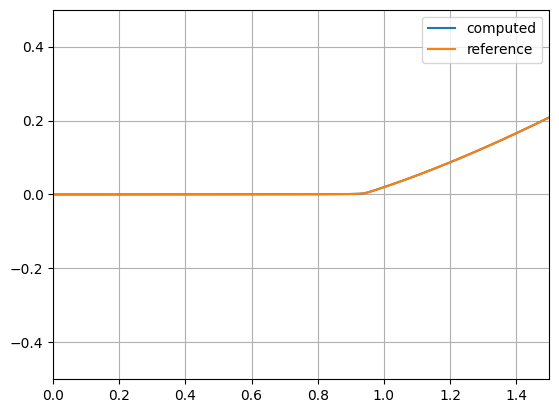

In [10]:
import json
import matplotlib.pyplot as plt
with open('1+1_test_files/flow_N=2,T=0.1,mu=0.1.json') as user_file:
    parsed_json = json.load(user_file)
    x = parsed_json["graphs"][-1]["x"]
    y = parsed_json["graphs"][-1]["y"]
plt.plot(return_data.grid, return_data.solution[-1], label="computed")
plt.plot(x, y, label="reference")
plt.grid()
plt.xlim([0.0, 1.5])
plt.ylim([-0.5, 0.5])
plt.legend()
plt.show()